In [1]:
import pandas as pd
import numpy as np
import setup_jwlab
from jwlab.constants import cleaned_data_filepath
from jwlab.cluster_analysis_perm import cluster_analysis_procedure
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, RepeatedKFold
from scipy import stats
import more_itertools as mit
from sklearn.metrics import accuracy_score


In [2]:
# Argument 1: 9 or 11 (month olds)
# Argument 2: Boolean, True to randomize the labels, False otherwise
# Argument 3: averaging, could be: no_averaging, average_trials, average_trials_and_participants, permutation
# Argument 4: sliding_window_config[start_time, end_time, window_lengths[], step_length]
# Argument 5: cross_val_config[num_fold, num_iterations]

#cluster_analysis_procedure(9, False, "permutation", [-200, 1000, [10, 20, 40, 60], 10], [3, 5])

loaded
mean: [[0.52, 0.47, 0.49, 0.51, 0.42, 0.42, 0.51, 0.53, 0.53, 0.58, 0.5, 0.51, 0.48, 0.45, 0.41, 0.41, 0.44, 0.44, 0.47, 0.49, 0.43, 0.44, 0.46, 0.45, 0.46, 0.45, 0.44, 0.48, 0.48, 0.5, 0.44, 0.45, 0.43, 0.44, 0.45, 0.49, 0.48, 0.45, 0.49, 0.48, 0.42, 0.49, 0.43, 0.44, 0.43, 0.46, 0.44, 0.42, 0.44, 0.45, 0.44, 0.4, 0.41, 0.43, 0.45, 0.43, 0.47, 0.44, 0.4, 0.42, 0.39, 0.45, 0.45, 0.45, 0.4, 0.49, 0.44, 0.46, 0.46, 0.47, 0.42, 0.44, 0.48, 0.45, 0.45, 0.5, 0.44, 0.5, 0.46, 0.46, 0.41, 0.44, 0.45, 0.4, 0.41, 0.36, 0.38, 0.38, 0.38, 0.4, 0.37, 0.4, 0.44, 0.35, 0.38, 0.39, 0.42, 0.43, 0.41, 0.42, 0.4, 0.41, 0.38, 0.39, 0.41, 0.42, 0.4, 0.41, 0.38, 0.44, 0.43, 0.4, 0.41, 0.52, 0.44, 0.46]]
stdev: [[0.02, 0.01, 0.01, 0.01, 0.02, 0.02, 0.01, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.02, 0.01, 0.02, 0.01, 0.01, 0.02, 0.02, 0.01, 0.02, 0.01, 0.02, 0.02, 0.01, 0.02, 0.02, 0.01, 0.01, 0.02

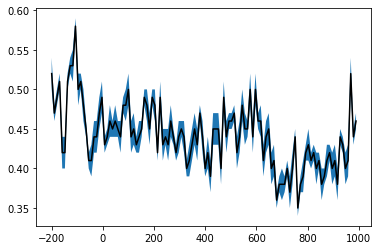

Valid windows are: [9]

Clusters are: []



ValueError: max() arg is an empty sequence

In [3]:
cluster_analysis_procedure(9, False, "permutation", [-200, 1000, [50], 10], [3, 15])